In [244]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [597]:
filename = "img/midnight_gospel.jpg"
img = cv2.imread(filename)

In [598]:
img = cv2.GaussianBlur(img, (5,5), 0)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
grad_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
grad_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)

abs_grad_x = cv2.convertScaleAbs(grad_x)
abs_grad_y = cv2.convertScaleAbs(grad_y)

In [599]:
grad = cv2.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)
grad = cv2.bitwise_not(grad)

In [637]:
dst = np.where(grad >= 175, 255, 0)

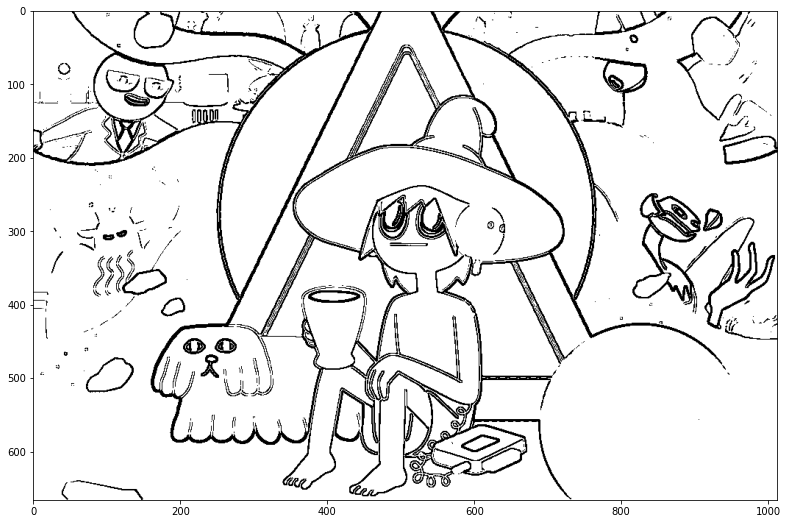

In [638]:
plt.figure(figsize=(15, 9))
plt.imshow(dst, cmap='gray')
plt.show()

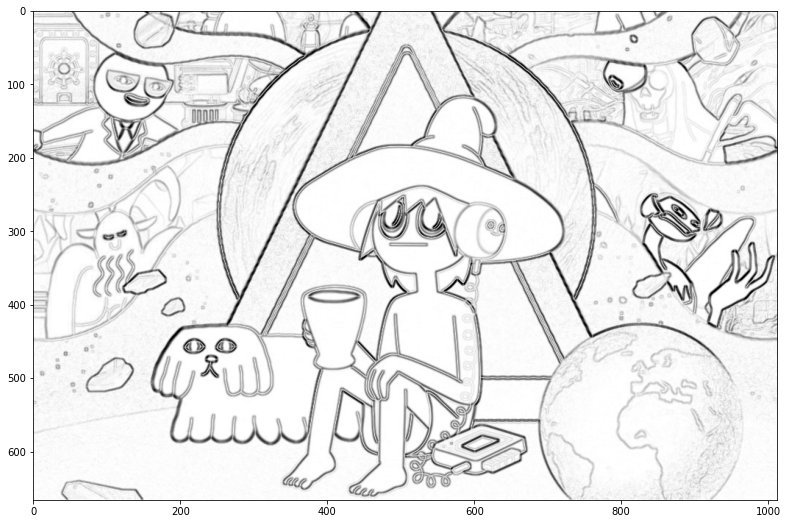

In [639]:
plt.figure(figsize=(15, 9))
plt.imshow(grad, cmap='gray')
plt.show()

In [640]:
indices = np.where(dst == [0])
coordinates = zip(indices[0], indices[1])
points = np.array([(x,y) for x, y in coordinates])
points = points[np.random.choice(points.shape[0], 2048, replace=False)]

H, W = img.shape[:2]

points = np.append(points, [[0,0]], axis=0)
points = np.append(points, [[0,W]], axis=0)
points = np.append(points, [[H,0]], axis=0)
points = np.append(points, [[H,W]], axis=0)

In [641]:
from scipy.spatial import Delaunay

tri = Delaunay(points)

In [642]:
img_rgb = cv2.imread(filename)
img_rgb = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2RGB)

## A point for each point

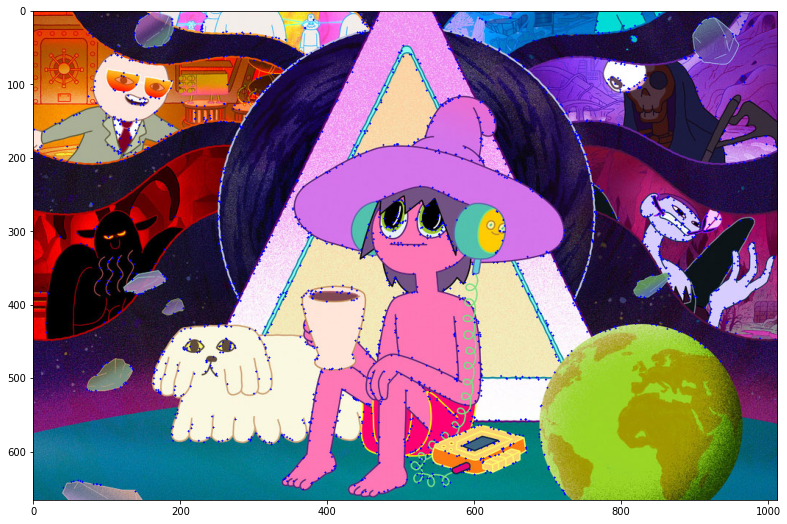

In [643]:
img = img_rgb
for p in points:
    x, y = p[1], p[0]
    img = cv2.circle(img, (x,y), radius=1, color=(0, 0, 255), thickness=-1)

plt.figure(figsize=(15, 9))
plt.imshow(img)
plt.show()


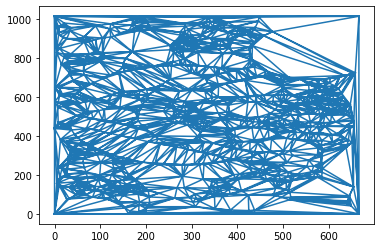

In [644]:
plt.triplot(points[:,0], points[:,1], tri.simplices)
plt.show()

In [645]:
img_rgb = cv2.imread(filename)
img_rgb = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2RGB)

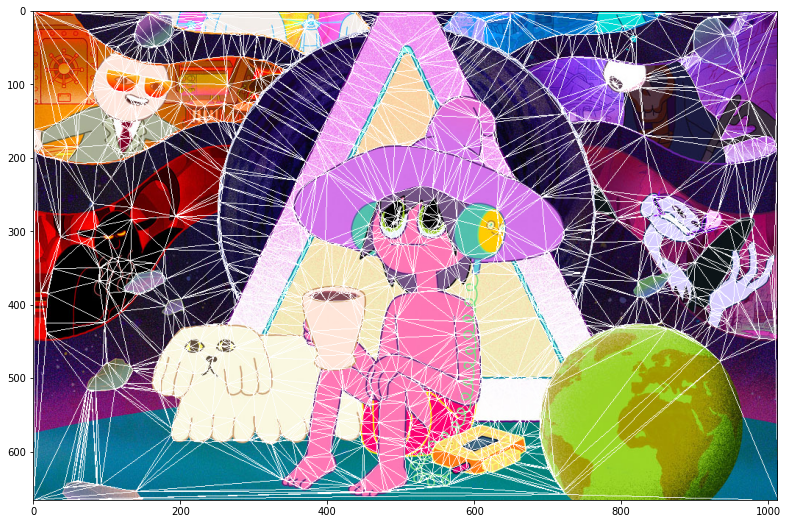

In [646]:
img_triang = img_rgb.copy()

for t in tri.simplices:
    pt1 = points[t[0]]
    pt1 = pt1[::-1]
    pt2 = points[t[1]]
    pt2 = pt2[::-1]
    pt3 = points[t[2]]
    pt3 = pt3[::-1]
    
    triangle_cnt = np.array([pt1, pt2, pt3])

    cv2.drawContours(img_triang, [triangle_cnt],0, (255, 255, 255),1)
    i+=1

plt.figure(figsize=(15, 9))
plt.imshow(img_triang)
plt.show()

In [647]:
gray = cv2.cvtColor(img_rgb,cv2.COLOR_RGB2GRAY)

mask = np.zeros(gray.shape,np.uint8)
final = np.zeros(img_rgb.shape,np.uint8)

i = 0

for t in tri.simplices:
    x, y, z = t
    # print(x, y, z)
    pt1 = points[t[0]]
    pt1 = pt1[::-1]
    pt2 = points[t[1]]
    pt2 = pt2[::-1]
    pt3 = points[t[2]]
    pt3 = pt3[::-1]
    
    triangle_cnt = np.array([pt1, pt2, pt3])
    
    mask[...]=0
    cv2.drawContours(mask, [triangle_cnt],-1,255,-1)
    cv2.drawContours(final, [triangle_cnt],-1,cv2.mean(img_rgb,mask),-1)
    i+=1

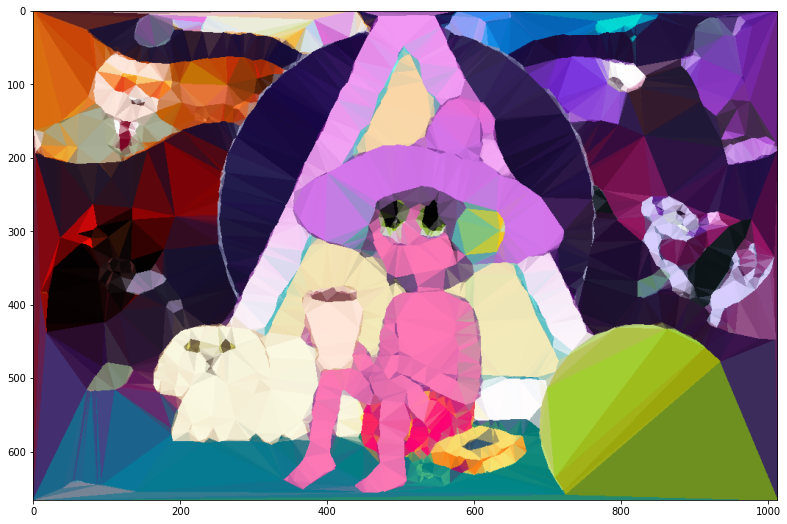

In [648]:
plt.figure(figsize=(15, 9))
plt.imshow(final)
plt.show()

In [649]:
cv2.imwrite("output_2.png", cv2.cvtColor(final, cv2.COLOR_RGB2BGR))

True